# Project: Statistics (Analyzing Movie Reviews)

<br>

## Questions to address:
- Investigate if Fandango ratings are biased
- Look at outliers between the Fandango and Metacritic ratings
- Do a linear regression to predict Fandango ratings
- Investigated if Fandango ratings are biased after 2016 review of scores
  - Check which movies and what type of information is available in the old and new dataset
- Compare Fandango's 2015 and 2016 ratings distribution  

<br>

## Tools:
- df.mean, df.media, np.std()
- quick pandas plotting
- df.sort_values('col', axis=0, ascending=False, inplace=True)
- df.reset_index(drop=True, inplace=True) 
- slope, intercept, r_value, p_value, stderr_slope = linregress()
- plot.kde, plot.bar

<br>

### load defaults

In [52]:
import pandas as pd
import re
import numpy as np
import requests 
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))

<br>

## Dataset 1: FiveThirtyEight information on how major movie review services rated movies

In [53]:
movies = pd.read_csv('./data/fandango_score_comparison.csv')
display(movies.iloc[:4,:10])

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2


The dataset contains user and critic scores from RottenTomatoes, Metacritic, IMDB, and Fandango. Each service has ratings on a different scale:
- RottenTomatoes - 0-100, in increments of 1.
- Metacritic - 0-100, in increments of 1.
- IMDB - 0-10, in increments of .1.
- Fandango - 0-5, in increments of .5.

To make it easier to compare scores across services:
- Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. 
- Any column with the suffix _round is the rounded version of another column. 

<br>

## Dataset 2: File with updated Fandango reviews for popular movies

In [51]:
df = pd.read_csv('./data/movie_ratings_16_17.csv')

#select only fandango ratings
selection = ['movie', 'year', 'fandango']
new_fandango = df[selection]
display(new_fandango[:3])

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


<br>

## Analysis 1: Investigate Whether Fandango ratings are biased

<br>

### Q1: Quick comparison between Metacritic and Fandango ratings

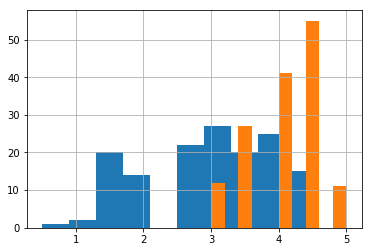

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

movies['Metacritic_norm_round'].hist()
movies['Fandango_Stars'].hist()

plt.show()

<br>

### Q2: Analyise population statistic for Metacritic and Fandango (mean, median and std) 

In [55]:
import numpy as np

mean_Metacritic = movies['Metacritic_norm_round'].mean()
median_Metacritic = movies['Metacritic_norm_round'].median()
std_dev_Metacritic = np.std(movies['Metacritic_norm_round'])

mean_Fandango = movies['Fandango_Stars'].mean()
median_Fandango = movies['Fandango_Stars'].median()
std_dev_Fandango = np.std(movies['Fandango_Stars'])

print("Mean Fandango: %0.2f, Mean Metacritic: %0.2f" % (mean_Fandango, mean_Metacritic))
print("Median Fandango: %0.2f, Median Metacritic: %0.2f" % (median_Fandango, median_Metacritic))
print("Std_dev Fandango: %0.2f, Std_dev Metacritic: %0.2f" % (std_dev_Fandango, std_dev_Metacritic))

Mean Fandango: 4.09, Mean Metacritic: 2.97
Median Fandango: 4.00, Median Metacritic: 3.00
Std_dev Fandango: 0.54, Std_dev Metacritic: 0.99


- The Fandango mean is higher than the median - distribution skewed towards high values

- The Fandango standard deviation is lower - "thiner" distribution

<b>These stats seem to indicate that Fandango ratings are biased high.</b>

<br>

### Q3: Look at the largest outliers in the difference between Metacritic and Fandango ratings

- Scatter plot between two ratings
- Calculate which movies have the largest absolute difference in ratings

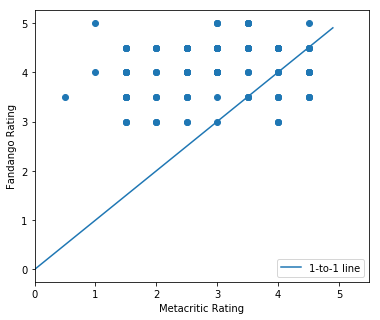

In [56]:
fig = plt.figure(figsize=(6,5))
ax= plt.subplot()
ax.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'], label='')
#show 1-to-1 line
xx = np.arange(0,5,0.1)
ax.plot(xx,xx, label='1-to-1 line')
ax.set_xlim(0.,5.5), ax.set_xlim(0.,5.5)
ax.legend(), ax.set_ylabel('Fandango Rating'), ax.set_xlabel('Metacritic Rating')

plt.show()

In [57]:
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
sorted_movies = movies.sort_values('fm_diff', axis=0, ascending=False)
sorted_movies.reset_index(drop=True, inplace=True) 
print(sorted_movies[['FILM','fm_diff']].iloc[:5])

                      FILM  fm_diff
0   Do You Believe? (2015)      4.0
1        Little Boy (2015)      3.0
2             Annie (2014)      3.0
3            Pixels (2015)      3.0
4  The Longest Ride (2015)      3.0


- There are large differences between the two ratings and a large number of outliers where Fandango ratings are larger

<br>

### Q4: Look at the correlation coefficient between Fandango_Stars and Metacritic_norm_round 

In [58]:
from scipy.stats.stats import pearsonr

r, p_value = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

print(r)

0.17844919073895918


- there is a low correlation between the two value indicating that one (ot the two) might be arbitrary
- this is another hint that Fandango rating smight be biased

<br>

### Q5: Create a linear regression to see what the predicted Fandango score would be based on the Metacritic score

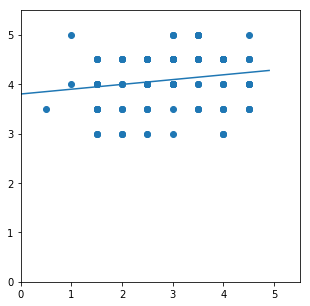

In [59]:
from scipy.stats.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

fig = plt.figure(figsize=(5,5))

plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
xx = np.arange(0,5,0.1)
yy = xx*slope+intercept
plt.plot(xx,yy)
plt.xlim(0,5.5), plt.ylim(0,5.5)
plt.show()

- There is almost no variation in the Fandango ratings. Therefore the Fandango rating is ~4 for any Metacritic rating

<br>

## Analysis 2: Investigate Whether Fandango ratings are still biased after 2016 review of scores

<br>

### Select some columns from the old ratings data set and slipt 'FILM' into movie and year

In [93]:
old_selection = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
old_fandango = movies[old_selection]

 
old_fandango.loc[:,'movie'] = old_fandango['FILM'].apply(lambda x: x.split('(')[0])
old_fandango.loc[:,'year'] = old_fandango['FILM'].apply(lambda x: int(x.split('(')[1].replace(')','')))

display(old_fandango[:3])

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015


<br>

### Q1: Check which movies are available in the old and new datasets

In [96]:
old_popular = old_fandango[old_fandango['Fandango_votes']>30]
print("Fraction of popular movies in the old dataset: %0.1f" % float(len(old_popular)/len(old_fandango)) )

Fraction of popular movies in the old dataset: 1.0


- New data set is only for popular movies
- Old dataset also has more than 30 votes in each movie so they are likely similar

In [97]:
print(old_popular['year'].value_counts())
print(new_fandango['year'].value_counts())

2015    129
2014     17
Name: year, dtype: int64
2016    191
2017     23
Name: year, dtype: int64


- years 2014 and 2017 have few movies. Let's focus on 2015 and 2016

In [99]:
fandango_2015 = old_popular.loc[old_popular['year']==2015,:]
fandango_2016 = new_fandango.loc[new_fandango['year']==2016,:]

display(fandango_2015[:3])
display(fandango_2016[:3])

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


<br>

### Q2: Compare the distribution for Fandango's ratings in 2015 vs 2016

In [110]:
print('2015 ratings:')
print(fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100.)

print('\n2016 ratings:')
print(fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100.)

2015 ratings:
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

2016 ratings:
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


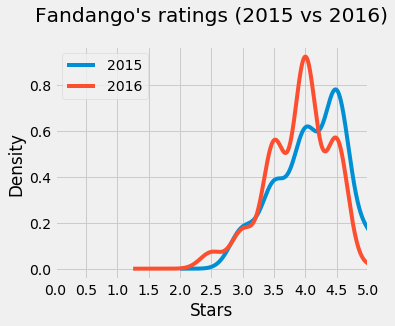

In [106]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend = True, figsize = (5,4))
fandango_2016['fandango'].plot.kde(label='2016', legend = True)

# the `y` parameter pads the title upward
plt.title("Fandango's ratings (2015 vs 2016)", y = 1.02) 
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

- Both distributions are strongly left skewed
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution (indicating some re-normalization)

<br>

### Q3: Compare summary statistics for 2015 vs 2016

In [112]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

display(summary)

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


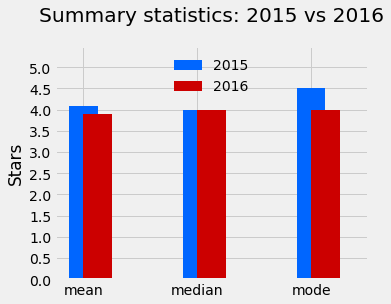

In [117]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (5,4))

plt.title('Summary statistics: 2015 vs 2016', y = 1.02)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Conclusion

- That there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 
- On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.
- We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system.